Import packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# import dataset
df = pd.read_csv('Prepared_data.csv',
                 encoding='latin1')
#check basic information
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,Yes


In [12]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,0.0,0.0,0.0,Autumn,Yes


<AxesSubplot:xlabel='Day_night'>

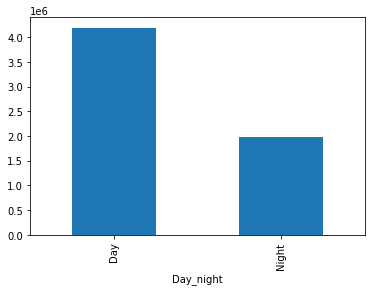

In [13]:
#to define whether the time is daytime or night
#assume 6:00 - 19:00 is daytime
def Day_or_Night(rows):
    if rows['Hour'] >19 or rows['Hour']<6:
        val = 'Night'
    else:
        val = 'Day'
    return val
df['Day_night'] = df.apply(Day_or_Night, axis=1)
df.groupby('Day_night').sum()['Rented Bike Count'].plot\
    .bar()

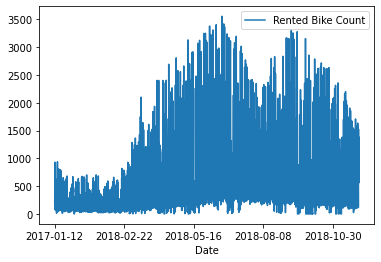

In [14]:
#plot the daily rents throughout the year:
date = df.plot.line(x='Date',y='Rented Bike Count')
date.figure.savefig('Daily_total_rents.jpg')
# From the ploy, we can roughly see that the highest
# amount of rents are between June 2018 to July 2018.
#We may  want to explore it further to see the link with
# the season

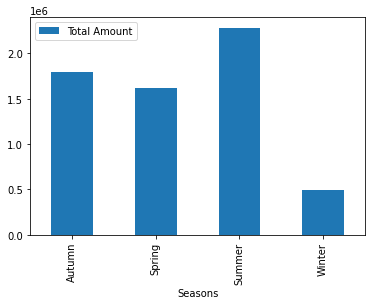

In [15]:
#
seasons = df.groupby('Seasons')['Rented Bike Count'].sum()\
    .reset_index(name ='Total Amount')
season = seasons.plot.bar(x = 'Seasons', y = 'Total '
                                              'Amount')
season.figure.savefig('Seasonal_total_rents.jpg')

we shall also look at the average bike count rented per
hour:

In [ ]:
df.groupby('Hour').mean()['Rented Bike Count'].plot.bar()


<AxesSubplot:xlabel='Temperature'>

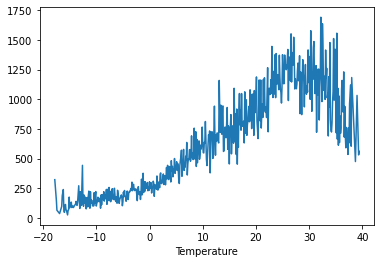

In [18]:
df.groupby('Temperature').mean()['Rented Bike Count']\
    .plot()

<AxesSubplot:xlabel='Snowfall (cm)'>

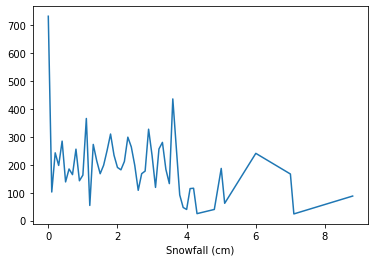

In [19]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()